In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.callbacks import Callback, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV, ParameterGrid

/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train_file = 'data/train.csv'
test_file = 'data/test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [6]:
train_labels = train_df.label
train_images = train_df.iloc[:,1:]
test_images = test_df

In [7]:
train_images = (train_images/train_images.max()).fillna(0) # normalize values
test_images = (test_images/test_images.max()).fillna(0) # normalize values
train_labels = pd.get_dummies(train_labels) # one-hot encoding of the label

train_labels.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [8]:
nodes = [32, 64, 128, 256, 512] # number of nodes in the hidden layer
lrs = [0.001, 0.002, 0.003] # learning rate, default = 0.001
epochs = 15
batch_size = 64

In [19]:
def build_model(nodes=10, lr=0.001):
    model = Sequential()
    model.add(Dense(nodes, kernel_initializer='uniform', input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    opt = optimizers.RMSprop(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return(model)

In [20]:
model = KerasClassifier(build_fn=build_model, epochs=epochs,
                        batch_size=batch_size, verbose=0)
X = train_images.values
Y = train_labels.values

In [21]:
param_grid = dict(nodes=nodes, lr=lrs)
param_grid

{'nodes': [32, 64, 128, 256, 512], 'lr': [0.001, 0.002, 0.003]}

In [22]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,
                    n_jobs=1, refit=True, verbose=2)

In [23]:
grid_result = grid.fit(X, Y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] lr=0.001, nodes=32 ..............................................
[CV] ............................... lr=0.001, nodes=32, total=  12.6s
[CV] lr=0.001, nodes=32 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


[CV] ............................... lr=0.001, nodes=32, total=  12.6s
[CV] lr=0.001, nodes=32 ..............................................
[CV] ............................... lr=0.001, nodes=32, total=  12.1s
[CV] lr=0.001, nodes=64 ..............................................
[CV] ............................... lr=0.001, nodes=64, total=  12.2s
[CV] lr=0.001, nodes=64 ..............................................
[CV] ............................... lr=0.001, nodes=64, total=  12.5s
[CV] lr=0.001, nodes=64 ..............................................
[CV] ............................... lr=0.001, nodes=64, total=  12.6s
[CV] lr=0.001, nodes=128 .............................................
[CV] .............................. lr=0.001, nodes=128, total=  12.4s
[CV] lr=0.001, nodes=128 .............................................
[CV] .............................. lr=0.001, nodes=128, total=  12.4s
[CV] lr=0.001, nodes=128 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 11.9min finished


In [25]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975381 using {'lr': 0.001, 'nodes': 512}
0.954619 (0.003059) with: {'lr': 0.001, 'nodes': 32}
0.963643 (0.001818) with: {'lr': 0.001, 'nodes': 64}
0.970405 (0.000805) with: {'lr': 0.001, 'nodes': 128}
0.973143 (0.000863) with: {'lr': 0.001, 'nodes': 256}
0.975381 (0.000342) with: {'lr': 0.001, 'nodes': 512}
0.955357 (0.001611) with: {'lr': 0.002, 'nodes': 32}
0.965310 (0.001312) with: {'lr': 0.002, 'nodes': 64}
0.970333 (0.001305) with: {'lr': 0.002, 'nodes': 128}
0.973476 (0.000978) with: {'lr': 0.002, 'nodes': 256}
0.973071 (0.002558) with: {'lr': 0.002, 'nodes': 512}
0.958643 (0.001588) with: {'lr': 0.003, 'nodes': 32}
0.964714 (0.002317) with: {'lr': 0.003, 'nodes': 64}
0.970429 (0.000997) with: {'lr': 0.003, 'nodes': 128}
0.972476 (0.000397) with: {'lr': 0.003, 'nodes': 256}
0.971976 (0.003032) with: {'lr': 0.003, 'nodes': 512}


In [26]:
acc = grid_result.cv_results_

In [30]:
grid_result.

sklearn.model_selection._search.GridSearchCV

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 42

In [32]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

Text(0,0.5,'sepal width (cm)')

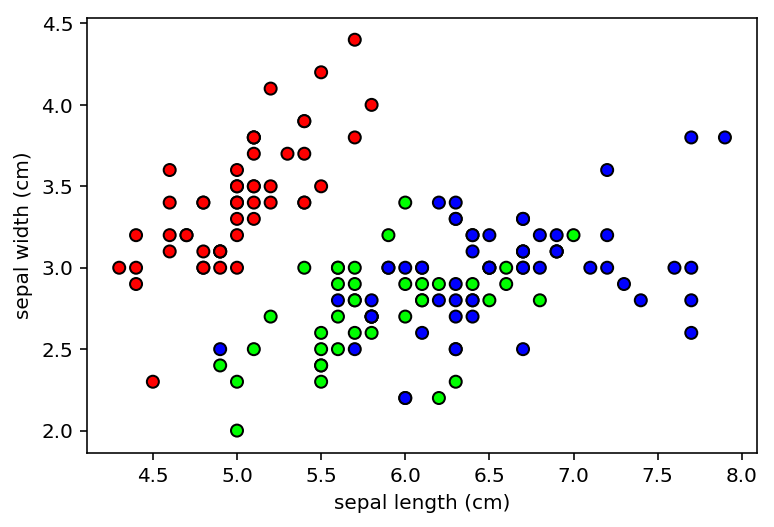

In [34]:
iris = datasets.load_iris()
x = iris.data
y = to_categorical(iris.target)
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

plt.scatter(x[:,xid],x[:,yid],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel(iris.feature_names[xid])
plt.ylabel(iris.feature_names[yid])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    validation_data=(x_val,y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/200
96/96 [==============================] - 0s 184us/step - loss: 0.1241 - acc: 1.0000 - val_loss: 0.2161 - val_acc: 0.9167
Epoch 2/200
96/96 [==============================] - 0s 177us/step - loss: 0.1244 - acc: 0.9792 - val_loss: 0.2093 - val_acc: 0.9167
Epoch 3/200
96/96 [==============================] - 0s 190us/step - loss: 0.1233 - acc: 1.0000 - val_loss: 0.2114 - val_acc: 0.9167
Epoch 4/200
96/96 [==============================] - 0s 176us/step - loss: 0.1244 - acc: 0.9792 - val_loss: 0.2090 - val_acc: 0.9167
Epoch 5/200
96/96 [==============================] - 0s 215us/step - loss: 0.1210 - acc: 0.9896 - val_loss: 0.2107 - val_acc: 0.9167
Epoch 6/200
96/96 [==============================] - 0s 220us/step - loss: 0.1209 - acc: 0.9896 - val_loss: 0.1994 - val_acc: 0.9167
Epoch 7/200
96/96 [==============================] - 0s 216us/step - loss: 0.1196 - acc: 0.9896 - val_loss: 0.1904 - val_acc: 0.9167
Epoch 8/200
96/96 [======

Epoch 62/200
96/96 [==============================] - 0s 203us/step - loss: 0.0867 - acc: 1.0000 - val_loss: 0.1953 - val_acc: 0.9167
Epoch 63/200
96/96 [==============================] - 0s 191us/step - loss: 0.0868 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 0.9167
Epoch 64/200
96/96 [==============================] - 0s 189us/step - loss: 0.0867 - acc: 1.0000 - val_loss: 0.2100 - val_acc: 0.9167
Epoch 65/200
96/96 [==============================] - 0s 178us/step - loss: 0.0845 - acc: 0.9896 - val_loss: 0.1909 - val_acc: 0.9167
Epoch 66/200
96/96 [==============================] - 0s 159us/step - loss: 0.0870 - acc: 0.9896 - val_loss: 0.1966 - val_acc: 0.9167
Epoch 67/200
96/96 [==============================] - 0s 187us/step - loss: 0.0838 - acc: 1.0000 - val_loss: 0.1968 - val_acc: 0.9167
Epoch 68/200
96/96 [==============================] - 0s 182us/step - loss: 0.0850 - acc: 0.9896 - val_loss: 0.1904 - val_acc: 0.9167
Epoch 69/200
96/96 [==============================] - 0s 178us

Epoch 123/200
96/96 [==============================] - 0s 157us/step - loss: 0.0654 - acc: 0.9896 - val_loss: 0.1857 - val_acc: 0.9167
Epoch 124/200
96/96 [==============================] - 0s 144us/step - loss: 0.0656 - acc: 1.0000 - val_loss: 0.1947 - val_acc: 0.9167
Epoch 125/200
96/96 [==============================] - 0s 169us/step - loss: 0.0647 - acc: 1.0000 - val_loss: 0.1698 - val_acc: 0.9167
Epoch 126/200
96/96 [==============================] - 0s 177us/step - loss: 0.0643 - acc: 1.0000 - val_loss: 0.1677 - val_acc: 0.9167
Epoch 127/200
96/96 [==============================] - 0s 150us/step - loss: 0.0656 - acc: 0.9896 - val_loss: 0.1619 - val_acc: 0.9167
Epoch 128/200
96/96 [==============================] - 0s 188us/step - loss: 0.0643 - acc: 1.0000 - val_loss: 0.1870 - val_acc: 0.9167
Epoch 129/200
96/96 [==============================] - 0s 186us/step - loss: 0.0637 - acc: 1.0000 - val_loss: 0.1980 - val_acc: 0.9167
Epoch 130/200
96/96 [==============================] - 

Epoch 184/200
96/96 [==============================] - 0s 210us/step - loss: 0.0525 - acc: 1.0000 - val_loss: 0.1755 - val_acc: 0.9167
Epoch 185/200
96/96 [==============================] - 0s 186us/step - loss: 0.0538 - acc: 0.9896 - val_loss: 0.1859 - val_acc: 0.9167
Epoch 186/200
96/96 [==============================] - 0s 169us/step - loss: 0.0573 - acc: 0.9896 - val_loss: 0.1919 - val_acc: 0.9167
Epoch 187/200
96/96 [==============================] - 0s 200us/step - loss: 0.0517 - acc: 1.0000 - val_loss: 0.1836 - val_acc: 0.9167
Epoch 188/200
96/96 [==============================] - 0s 169us/step - loss: 0.0530 - acc: 1.0000 - val_loss: 0.1920 - val_acc: 0.9167
Epoch 189/200
96/96 [==============================] - 0s 173us/step - loss: 0.0529 - acc: 0.9896 - val_loss: 0.1810 - val_acc: 0.9167
Epoch 190/200
96/96 [==============================] - 0s 167us/step - loss: 0.0525 - acc: 1.0000 - val_loss: 0.1801 - val_acc: 0.9167
Epoch 191/200
96/96 [==============================] - 

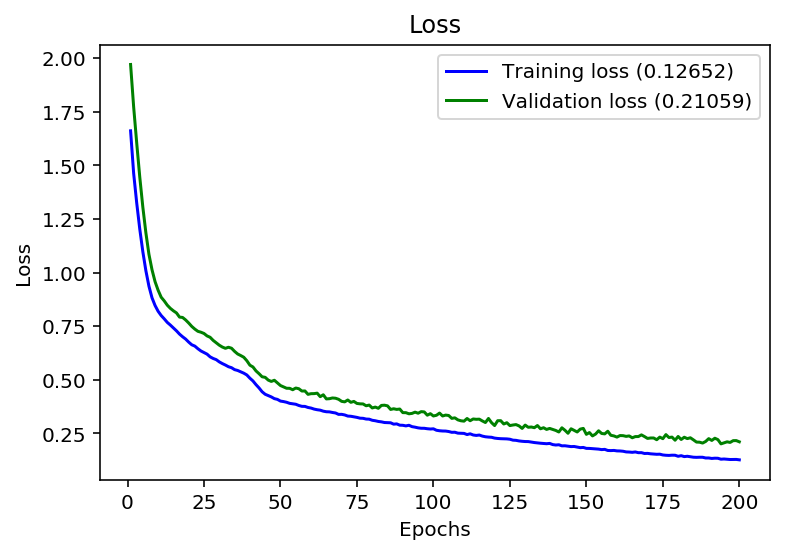

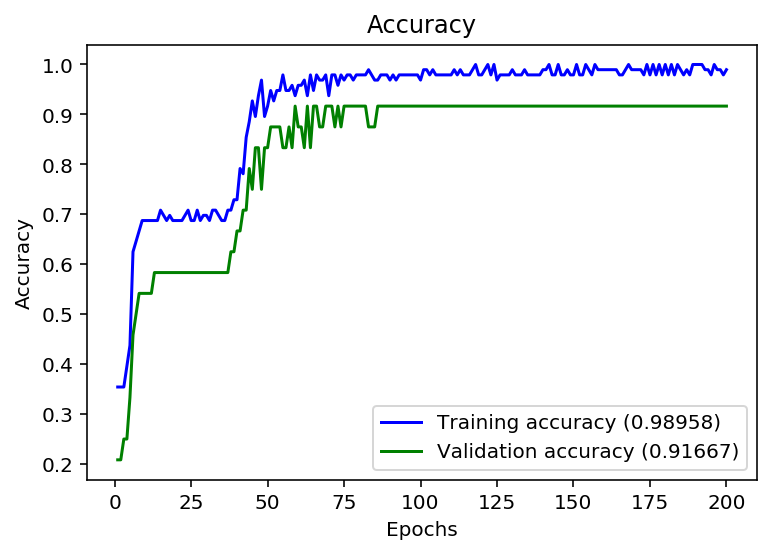

In [37]:
plot_history(history)

/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.9666666666666667

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000        10
          1    1.00000   0.88889   0.94118         9
          2    0.91667   1.00000   0.95652        11

avg / total    0.96944   0.96667   0.96641        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


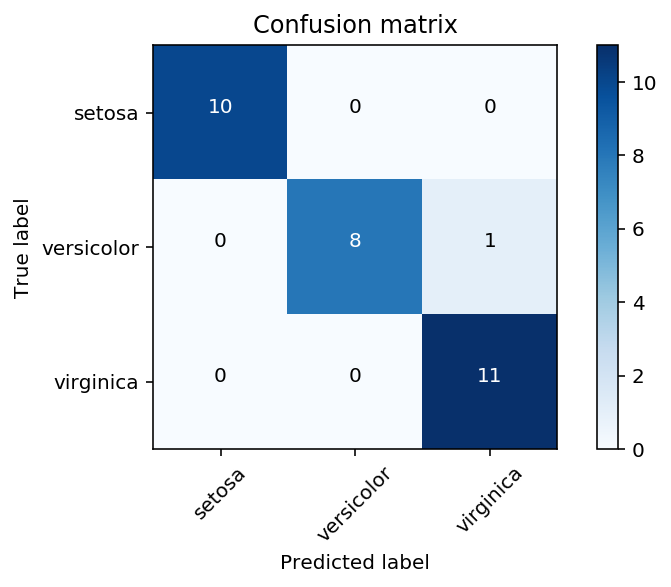

In [39]:
full_multiclass_report(model,
                       x_test,
                       y_test,
                       le.inverse_transform(np.arange(3)))

In [40]:
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(4,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5)

param_grid = {'dense_layers': [[4],[8],[8,8]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[5,16]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(x_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/visionnoob/anaconda3/envs/py36tf17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [ ]:
## First redefine y as categorical variable
y = to_categorical(iris.target,3)

## Rebuild the training and test set with the categorical y
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

## Capture the best params
params = grid_results.best_params_

## create the model with the best params found
model = create_model(dense_layers=params['dense_layers'],
                     activation=params['activation'],
                     optimizer=params['optimizer'])

## Then train it and display the results
history = model.fit(x_train,
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose = 0)

model.summary()
plot_history(history)
full_multiclass_report(model,
                       x_test,
                       y_test,
                       classes=le.inverse_transform(np.arange(3)))